# Active inference - Chapter 2

## Posterior probability
$$
P(x|y) = \frac{P(x)P(y|x)}{P(y)}
$$

In [1]:
import numpy as np

keys = ['frog', 'apple']
# index 0: frog, 1: apple
prior_beliefs = np.array([0.1, 0.9])

# 1st index 0: frog, 1: apple
# 2nd index 0: jumps, 1: stays
likelihoods = np.array([[0.81, 0.19],
                        [0.01, 0.99]])

# probability of jumping
p_jump = prior_beliefs @ likelihoods[:, 0]
print('p_jump: {:.3f}'.format(p_jump))
# posterior belief
posterior_beliefs = likelihoods[:, 0] * prior_beliefs / p_jump
for i in range(2):
    print('posterior belief of {}: {:.3f}'.format(keys[i], posterior_beliefs[i]))

p_jump: 0.090
posterior belief of frog: 0.900
posterior belief of apple: 0.100


## Define surprise
KL-Divergence can be defined as:
$$
D_{KL} \left[ Q(x) \| P(x) \right] = \mathbb{E}_{Q(x)} \left[ \text{ln } Q(x) - \text{ln } P(x) \right]
$$


Using KL-Divergence, we can quantify the Bayesian surprise in the example as:
$$
D_{KL} \left[ P(x|y) \| P(x) \right]
$$

In [4]:
def kl_divergence(p, q):
    return np.sum(p * np.log(p / q))

# KL divergence between prior and posterior
kl = kl_divergence(prior_beliefs, posterior_beliefs)
print('Surprise: {:.3f}'.format(kl))

Surprise: 1.758


## Minimizing Variatonal Free Energy
The exact Bayesian inference supporting perception and action is computationally intractable: model evidence ($P(y)$) and the posterior probability ($P(x|y)$) cannot be computed for two possible reasons:

    1. For complex models, there may be many types of hidden states that all need marginalizing out (= making the probel computationally intractable)
    2. The marginalization operation might require analytically intractable integrals

Although posterior probability and model evidence are intractable quantaties, it can be computed efficiently with two approximated quantities: *approximate posterior* $Q$ and a *variational free energy*, $F$.

$$
F[Q, y] = -\mathbb{E}_{Q(x)} \left[ \text{ln } P(y, x) \right] - H \left[ Q(x) \right]\\
%= D_{KL} \left[ Q(x) \| P(x) \right] - \mathbb{E}_{Q(x)} \left[ \text{ln } P(y|x) \right] \\
%= D_{KL} \left[ Q(x) \| P(x|y) \right] - \text{ln } P(y)
$$

Entropy $H\left [Q(x)\right]$ is defined as:
$$
H\left [Q(x)\right]:=-\displaystyle\sum Q(x) \text{ln }(Q(x)) = \mathbb{E}_{Q(x)} \left[- \text{ln } Q(x) \right]\\
$$

and Energy $\mathbb{E}_{Q(x)} \left[ \text{ln } P(y, x) \right] $ can be expressed in two ways:
$$
\mathbb{E}_{Q(x)} \left[ \text{ln } P(y, x) \right] 
= \mathbb{E}_{Q(x)} \left[ \text{ln } P(y|x) P(x) \right] = \mathbb{E}_{Q(x)} \left[ \text{ln } P(y|x) + \text{ln} P(x) \right] \\
= \mathbb{E}_{Q(x)} \left[ \text{ln } P(x|y) P(y) \right] = \mathbb{E}_{Q(x)} \left[ \text{ln } P(x|y) + \text{ln }P(y) \right] \\   
$$

therefore:

$
F[Q, y] \;= -\mathbb{E}_{Q(x)} \left[ \text{ln } P(y, x) \right] - H \left[ Q(x) \right]\\ 
\quad\qquad =\mathbb{E}_{Q(x)} \left[ \text{ln } Q(x) - \text{ln } P(y|x) -\text{ln } P(x) \right] = D_{KL} \left[ Q(x) \| P(x) \right] - \mathbb{E}_{Q(x)} \left[ \text{ln } P(y|x) \right] \\
\quad\qquad = \mathbb{E}_{Q(x)} \left[ \text{ln } Q(x) - \text{ln } P(x|y) - \text{ln }P(y) \right] = D_{KL} \left[ Q(x) \| P(x|y) \right] - \text{ln } P(y)
$

The 1st line shows that minimizing requires consistency with the generative model (*energy*) while also maintaining a high posterior *entropy*; we should be uncertain when we have no information.

The 2nd line emphasizes the interpretation as finding the best(simplest = minimally *complex*) explanation that is able to *accurately* account for the data (cf. Occam's razor).

The 3rd line expresses the free energy as a bound on negative log evidence. It shows that perceptual inference is not the only way to minimize free energy. We could also change the log evidence term through acting to change sensory data.

# Minimizing Expected Free Energy

The expected free energy can be expressed as below:

$$
G(\pi) = - \mathbb{E}_{Q(\tilde{x}, \tilde{y} | \pi)} \left[ D_{KL} \left[ Q(\tilde{x} | \tilde{y}, \pi) \| Q(\tilde{x}|\pi) \right] \right] - \mathbb{E}_{Q(\tilde{y}|\pi)} \left[ \text{ln } P(\tilde{y}|C) \right]
$$

### Excercise Example - Projective Identification
Let us say Dr. Smith is meeting a patient, Jane. 

Dr. Smith's internal state can be modeled as a binary variable with two possible states: neutral ($x_1$), and angry/critical ($x_2$).

The observations will be modeled into two possible states: comforting words ($y_1$), and critical words ($y_2$).

Let's assume the following probability distribution:
* Prior probabilities of Dr. Smith's state given a policy $\pi$: $Q(x|\pi)$ = [0.3, 0.7]


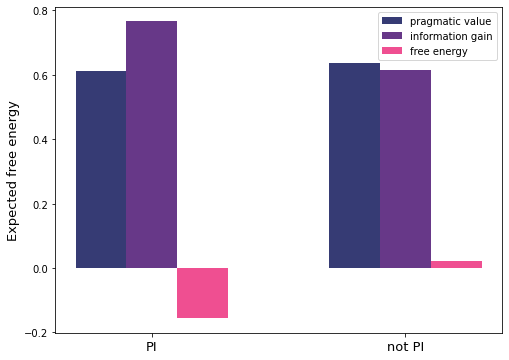

In [57]:
import matplotlib.pyplot as plt
# prior belief of Dr. Smith's state (Q(x|pi), 2 x 1)
prior_beliefs = np.array([[0.3],
                          [0.7]])
# likelihood1 of observations given Dr. Smith's state (P(y|x), 2 x 2)
#                         y1   y2
likelihoods1 = np.array([[0.7, 0.3],   # x1
                        [0.05, 0.95]]) # x2

# likelihood2 of observations given Dr. Smith's state (P(y|x), 2 x 2)
#                         y1   y2
likelihoods2 = np.array([[0.8, 0.2],   # x1
                        [0.1, 0.9]])   # x2

# joint probability of Dr. Smith's state and observations for policy 1 (Q(x,y|pi), 2 x 2)
joint_prob1 = likelihoods1 * prior_beliefs
# joint probability of Dr. Smith's state and observations for policy 2 (Q(x,y|pi), 2 x 2)
joint_prob2 = likelihoods2 * prior_beliefs

# posterior belief for policy 1 (Q(x|y,pi), 2 x 2)
posterior_beliefs1 = joint_prob1 / np.sum(joint_prob1, axis=0)
# posterior belief for policy 2 (Q(x|y,pi), 2 x 2)
posterior_beliefs2 = joint_prob2 / np.sum(joint_prob2, axis=0)

# marginal probability of observations for policy 1 (Q(y|pi), 2 x 1)
marginal_prob1 = np.sum(joint_prob1, axis=0)
# marginal probability of observations for policy 2 (Q(y|pi), 2 x 1)
marginal_prob2 = np.sum(joint_prob2, axis=0)

# Jane's preference
pref = np.array([0.4, 0.6])

# expected free energy for policy 1
infogain1 = np.sum(joint_prob1 * kl_divergence(posterior_beliefs1, prior_beliefs))
pragval1 = - np.sum(marginal_prob1 * np.log(pref))
free_energy1 = - infogain1 + pragval1

# expected free energy for policy 2
infogain2 = np.sum(joint_prob2 * kl_divergence(posterior_beliefs2, prior_beliefs))
pragval2 = - np.sum(marginal_prob2 * np.log(pref))
free_energy2 = - infogain2 + pragval2

groups = ['PI', 'not PI']

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
# plot bar graph of pragmatic value, information gain, and free energy next to each other
ax.bar(np.arange(2), [pragval1, pragval2], width=0.2, label='pragmatic value', color="#363b74")
ax.bar(np.arange(2) + 0.2, [infogain1, infogain2], width=0.2, label='information gain', color="#673888")
ax.bar(np.arange(2) + 0.4, [free_energy1, free_energy2], width=0.2, label='free energy', color="#ef4f91")

ax.set_xticks(np.arange(2) + 0.2)
ax.set_xticklabels(groups, fontsize=13)
ax.set_ylabel('Expected free energy', fontsize=13)

ax.legend()
plt.show()